<a href="https://colab.research.google.com/github/Abhishek2104200/CUBE_AI/blob/main/weather_prediction_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv('weather.csv')

In [3]:
data.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,...,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No


In [4]:
data.shape

(366, 22)

# **PRE PROCESSING**


In [5]:
# Check for missing values and data types
missing_values = data.isnull().sum()
data_info = data.info()

# Get descriptive statistics for numerical columns
descriptive_stats = data.describe()

missing_values, descriptive_stats


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        366 non-null    float64
 1   MaxTemp        366 non-null    float64
 2   Rainfall       366 non-null    float64
 3   Evaporation    366 non-null    float64
 4   Sunshine       363 non-null    float64
 5   WindGustDir    363 non-null    object 
 6   WindGustSpeed  364 non-null    float64
 7   WindDir9am     335 non-null    object 
 8   WindDir3pm     365 non-null    object 
 9   WindSpeed9am   359 non-null    float64
 10  WindSpeed3pm   366 non-null    int64  
 11  Humidity9am    366 non-null    int64  
 12  Humidity3pm    366 non-null    int64  
 13  Pressure9am    366 non-null    float64
 14  Pressure3pm    366 non-null    float64
 15  Cloud9am       366 non-null    int64  
 16  Cloud3pm       366 non-null    int64  
 17  Temp9am        366 non-null    float64
 18  Temp3pm   

(MinTemp           0
 MaxTemp           0
 Rainfall          0
 Evaporation       0
 Sunshine          3
 WindGustDir       3
 WindGustSpeed     2
 WindDir9am       31
 WindDir3pm        1
 WindSpeed9am      7
 WindSpeed3pm      0
 Humidity9am       0
 Humidity3pm       0
 Pressure9am       0
 Pressure3pm       0
 Cloud9am          0
 Cloud3pm          0
 Temp9am           0
 Temp3pm           0
 RainToday         0
 RISK_MM           0
 RainTomorrow      0
 dtype: int64,
           MinTemp     MaxTemp    Rainfall  Evaporation    Sunshine  \
 count  366.000000  366.000000  366.000000   366.000000  363.000000   
 mean     7.265574   20.550273    1.428415     4.521858    7.909366   
 std      6.025800    6.690516    4.225800     2.669383    3.481517   
 min     -5.300000    7.600000    0.000000     0.200000    0.000000   
 25%      2.300000   15.025000    0.000000     2.200000    5.950000   
 50%      7.450000   19.650000    0.000000     4.200000    8.600000   
 75%     12.500000   25.50

In [6]:
# Handle missing numerical data by filling with the mean
data['Sunshine'].fillna(data['Sunshine'].mean(), inplace=True)
data['WindGustSpeed'].fillna(data['WindGustSpeed'].mean(), inplace=True)
data['WindSpeed9am'].fillna(data['WindSpeed9am'].mean(), inplace=True)

# Handle missing categorical data by filling with the mode
data['WindGustDir'].fillna(data['WindGustDir'].mode()[0], inplace=True)
data['WindDir9am'].fillna(data['WindDir9am'].mode()[0], inplace=True)
data['WindDir3pm'].fillna(data['WindDir3pm'].mode()[0], inplace=True)

# Verify there are no missing values left
missing_values_after = data.isnull().sum()

missing_values_after


<ipython-input-6-9137d38df23b>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Sunshine'].fillna(data['Sunshine'].mean(), inplace=True)
<ipython-input-6-9137d38df23b>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

,0
MinTemp,0
MaxTemp,0
Rainfall,0
Evaporation,0
Sunshine,0
WindGustDir,0
WindGustSpeed,0
WindDir9am,0
WindDir3pm,0
WindSpeed9am,0


# **ANALYSIS & VISUALIZATION**


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Encode categorical variables for visualization
data_encoded = data.copy()
data_encoded['RainToday'] = data_encoded['RainToday'].map({'No': 0, 'Yes': 1})
data_encoded['RainTomorrow'] = data_encoded['RainTomorrow'].map({'No': 0, 'Yes': 1})

# Set up the plotting style
sns.set(style="whitegrid")


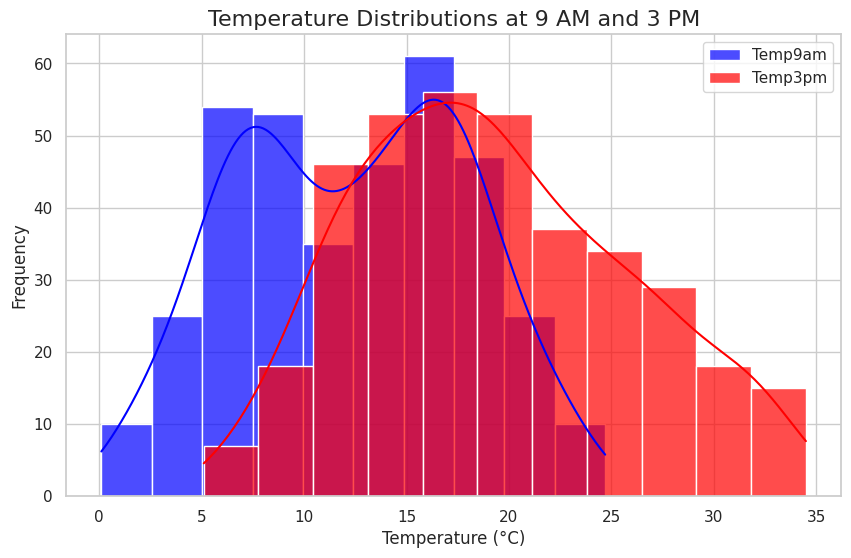

In [8]:
# Plot 1: Temperature Distributions
plt.figure(figsize=(10, 6))
sns.histplot(data=data_encoded, x="Temp9am", color="blue", kde=True, label="Temp9am", alpha=0.7)
sns.histplot(data=data_encoded, x="Temp3pm", color="red", kde=True, label="Temp3pm", alpha=0.7)
plt.title("Temperature Distributions at 9 AM and 3 PM", fontsize=16)
plt.xlabel("Temperature (°C)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.legend()
plt.show()

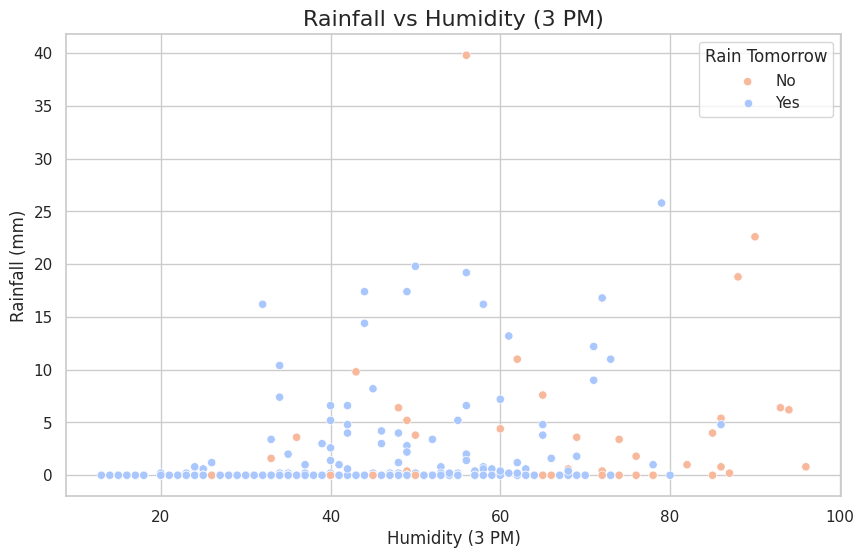

In [9]:
# Plot 2: Rainfall vs Humidity
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_encoded, x="Humidity3pm", y="Rainfall", hue="RainTomorrow", palette="coolwarm")
plt.title("Rainfall vs Humidity (3 PM)", fontsize=16)
plt.xlabel("Humidity (3 PM)", fontsize=12)
plt.ylabel("Rainfall (mm)", fontsize=12)
plt.legend(title="Rain Tomorrow", labels=["No", "Yes"])
plt.show()

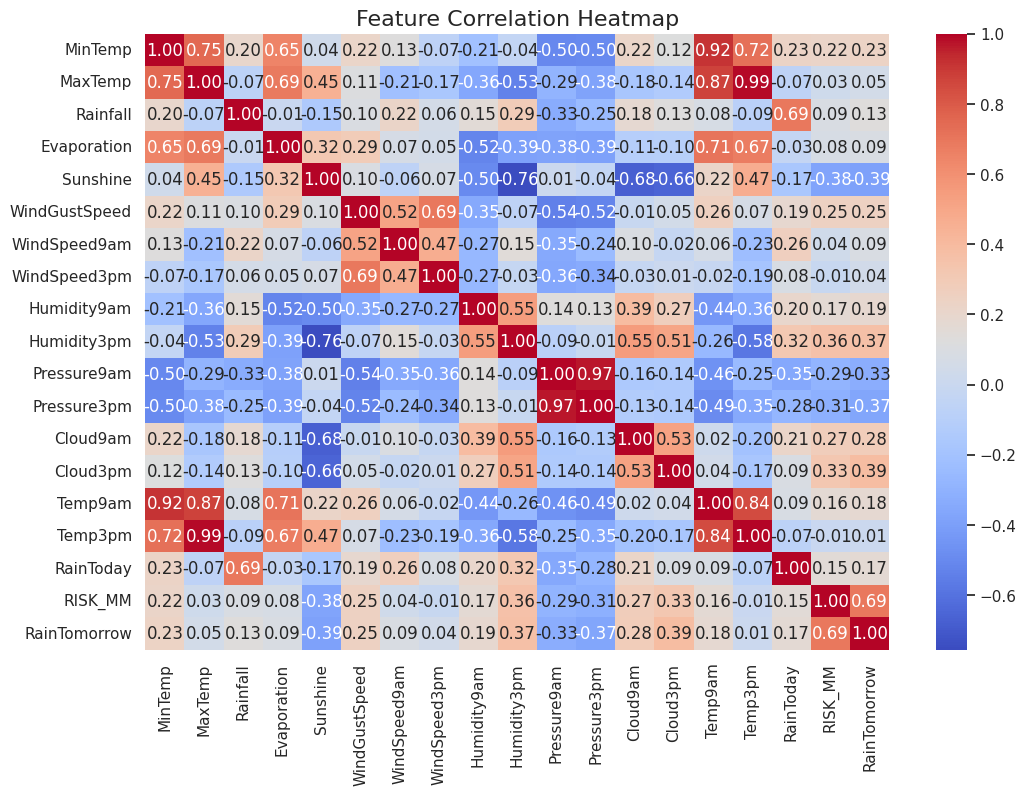

In [10]:

plt.figure(figsize=(12, 8))

# Before calculating correlation, select only numerical features:
numerical_data = data_encoded.select_dtypes(include=np.number)  # Select numerical columns only

correlation = numerical_data.corr()  # Calculate correlation on numerical data
sns.heatmap(correlation, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Feature Correlation Heatmap", fontsize=16)
plt.show()

<ipython-input-11-745b5a57293c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x="WindGustDir", order=data['WindGustDir'].value_counts().index, palette="viridis")


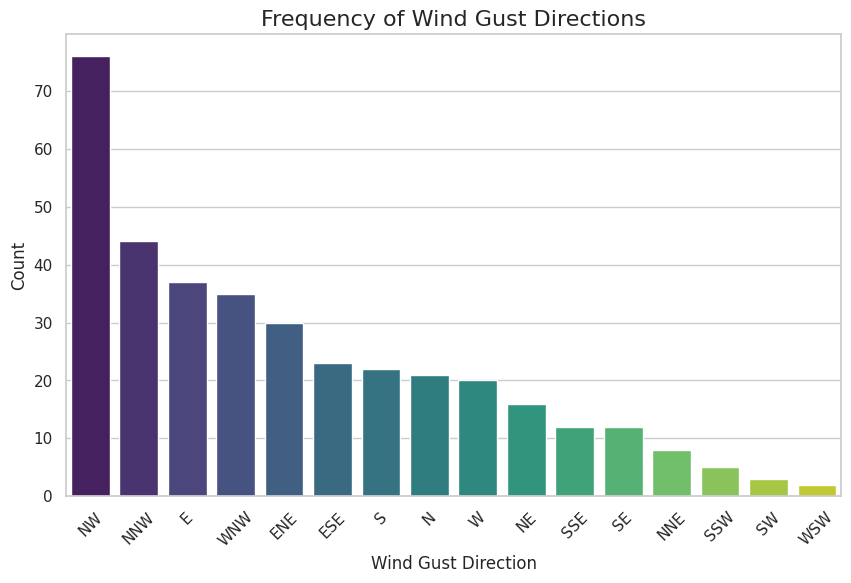

In [11]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x="WindGustDir", order=data['WindGustDir'].value_counts().index, palette="viridis")
plt.title("Frequency of Wind Gust Directions", fontsize=16)
plt.xlabel("Wind Gust Direction", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)
plt.show()


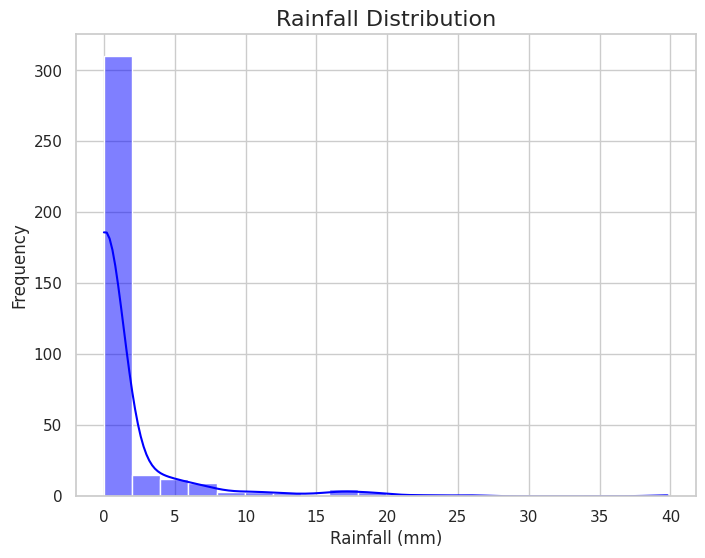

In [12]:
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x="Rainfall", bins=20, kde=True, color="blue")
plt.title("Rainfall Distribution", fontsize=16)
plt.xlabel("Rainfall (mm)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()


<ipython-input-13-f91b6912e9e5>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=correlation, x='RainTomorrow', y='index', palette='coolwarm', orient='h')


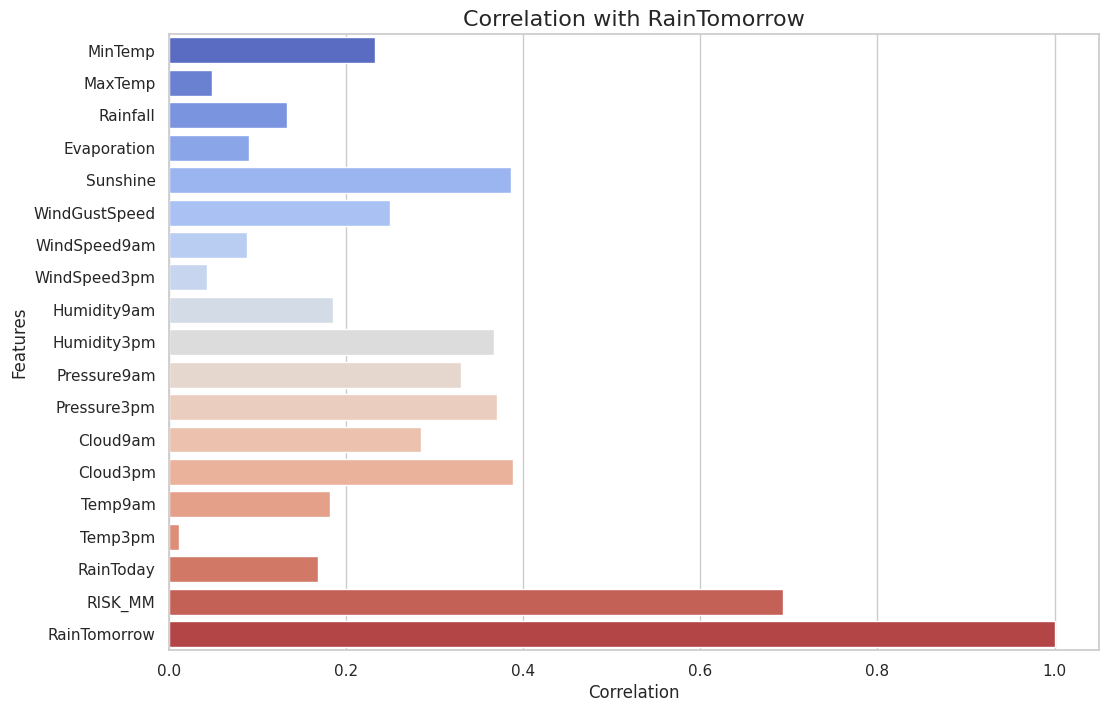

In [13]:
plt.figure(figsize=(12, 8))

numerical_data = data.select_dtypes(include=np.number)  # Select numerical columns only


correlation = data_encoded.drop(columns=['WindGustDir', 'WindDir9am', 'WindDir3pm']).corr()[['RainTomorrow']].abs().reset_index()  # Use data_encoded for 'RainTomorrow' colum

sns.barplot(data=correlation, x='RainTomorrow', y='index', palette='coolwarm', orient='h')
plt.title("Correlation with RainTomorrow", fontsize=16)
plt.xlabel("Correlation", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.show()

In [14]:
# Check if 'Date' column exists
if 'Date' in data.columns:
    print("The dataset has a 'Date' column.")
    print(data['Date'].head())  # Preview the first few rows
else:
    print("The dataset does not have a 'Date' column.")


The dataset does not have a 'Date' column.


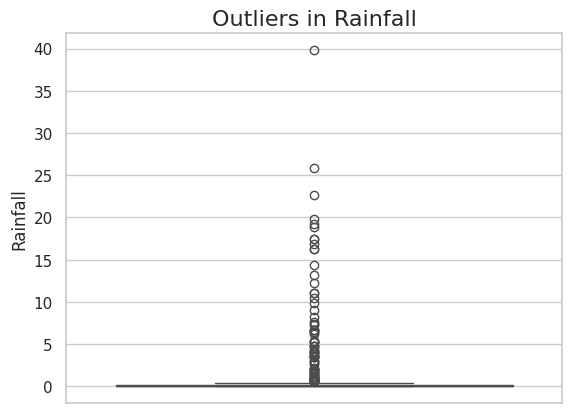

In [15]:
# Detect outliers in Rainfall
sns.boxplot(data=data, y='Rainfall')
plt.title("Outliers in Rainfall", fontsize=16)
plt.show()


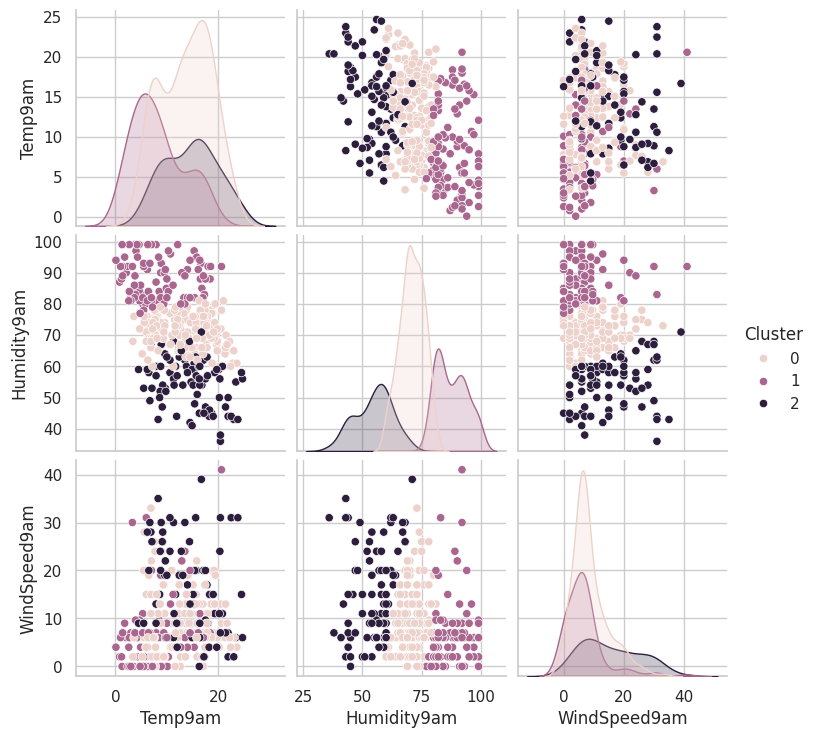

In [16]:
from sklearn.cluster import KMeans

# Select features for clustering
features = data[['Temp9am', 'Humidity9am', 'WindSpeed9am']].dropna()

# Apply KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(features)

# Visualize clusters
sns.pairplot(data, vars=['Temp9am', 'Humidity9am', 'WindSpeed9am'], hue='Cluster')
plt.show()


#  **MODELS**


## Rain Tomorrow?

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Preprocessing: Drop rows with missing target and encode target variable
data = data.dropna(subset=['RainTomorrow'])  # Drop rows with missing target
data['RainTomorrow'] = data['RainTomorrow'].map({'Yes': 1, 'No': 0})  # Encode target

# Select features and target
features = ['Rainfall', 'Humidity9am', 'Temp9am', 'WindSpeed9am', 'Cloud9am']
X = data[features].fillna(0)  # Fill missing feature values
y = data['RainTomorrow']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.87      1.00      0.93        92
           1       1.00      0.22      0.36        18

    accuracy                           0.87       110
   macro avg       0.93      0.61      0.65       110
weighted avg       0.89      0.87      0.84       110

[[92  0]
 [14  4]]


In [18]:

examples = pd.DataFrame({
    'Rainfall': [2.0, 0.0, 10.0, 5.0],
    'Humidity9am': [60.0, 90.0, 75.0, 80.0],
    'Temp9am': [20.0, 15.0, 25.0, 18.0],
    'WindSpeed9am': [10.0, 5.0, 20.0, 15.0],
    'Cloud9am': [6.0, 8.0, 2.0, 7.0]
})

predictions = model.predict(examples)

for i, prediction in enumerate(predictions):
    if prediction == 1:
        print(f"Example {i+1}: Rain predicted tomorrow")
    else:
        print(f"Example {i+1}: No rain predicted tomorrow")

Example 1: No rain predicted tomorrow
Example 2: Rain predicted tomorrow
Example 3: No rain predicted tomorrow
Example 4: No rain predicted tomorrow


## Predict Temp3pm

In [19]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

data = data.dropna(subset=['Temp3pm'])  # Drop rows with missing target

features = ['Temp9am', 'Humidity9am', 'WindSpeed9am', 'Cloud9am']
X = data[features].fillna(0)  # Fill missing feature values
y = data['Temp3pm']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train model
regressor = RandomForestRegressor(random_state=42)
regressor.fit(X_train, y_train)

# Predictions and evaluation
y_pred = regressor.predict(X_test)
print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"R² Score: {r2_score(y_test, y_pred)}")


MAE: 2.463018181818181
MSE: 9.316663636363632
R² Score: 0.7899296217572893


In [20]:
new_data = pd.DataFrame({
    'Temp9am': [20, 25, 18],
    'Humidity9am': [60, 70, 55],
    'WindSpeed9am': [10, 5, 15],
    'Cloud9am': [4, 2, 7]
})
# Make predictions using the trained regressor
predicted_temp3pm = regressor.predict(new_data)
round(predicted_temp3pm[1],2)


30.05

# Predict Rainfall amount

In [21]:
features = ['Humidity9am', 'Humidity3pm', 'Temp9am', 'Temp3pm', 'Cloud9am']
X = data[features].fillna(0)  # Fill missing feature values with 0
y = data['Rainfall']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

regressor = RandomForestRegressor(random_state=42)
regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = regressor.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")

# Feature Importance
importances = regressor.feature_importances_
for feature, importance in zip(features, importances):
    print(f"Feature: {feature}, Importance: {importance:.4f}")

Model Evaluation:
Mean Absolute Error (MAE): 2.2389636363636365
Mean Squared Error (MSE): 26.199251381818176
R² Score: 0.13431546345402645
Feature: Humidity9am, Importance: 0.1899
Feature: Humidity3pm, Importance: 0.2419
Feature: Temp9am, Importance: 0.2545
Feature: Temp3pm, Importance: 0.2320
Feature: Cloud9am, Importance: 0.0817


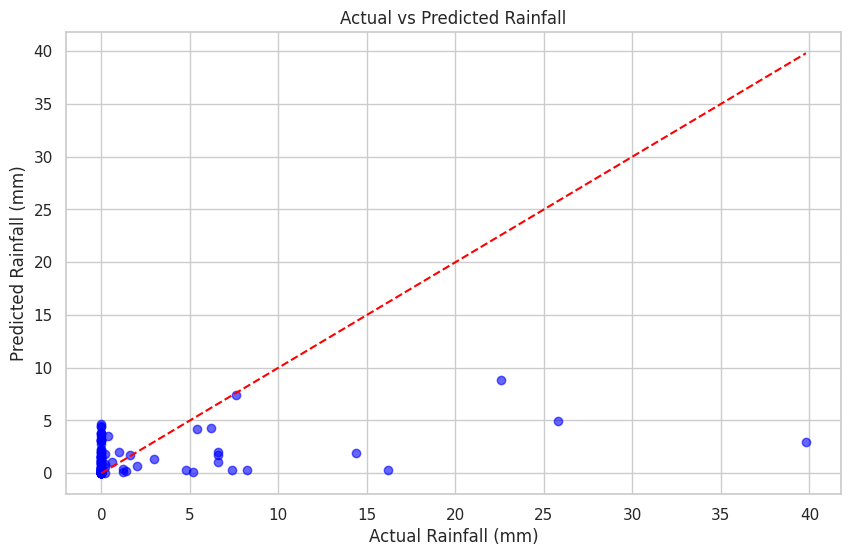

Predicted Rainfall for sample 1: 1.80 mm
Predicted Rainfall for sample 2: 7.61 mm
Predicted Rainfall for sample 3: 1.62 mm


In [22]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([0, max(y_test)], [0, max(y_test)], color='red', linestyle='--')  # 45-degree line
plt.title('Actual vs Predicted Rainfall')
plt.xlabel('Actual Rainfall (mm)')
plt.ylabel('Predicted Rainfall (mm)')
plt.show()

# Predict some sample values of Rainfall
sample_data = pd.DataFrame({
    'Humidity9am': [65, 80, 70],  # Sample humidity values at 9am
    'Humidity3pm': [75, 85, 77],  # Sample humidity values at 3pm
    'Temp9am': [22.0, 25.3, 21.5],  # Sample temperature values at 9am
    'Temp3pm': [28.0, 32.5, 27.2],  # Sample temperature values at 3pm
    'Cloud9am': [5, 8, 6],  # Sample cloud cover at 9am
})

# Predict rainfall for new data
sample_predictions = regressor.predict(sample_data)

# Show predictions
for i, pred in enumerate(sample_predictions):
    print(f"Predicted Rainfall for sample {i+1}: {pred:.2f} mm")

## Predict Humidity3pm

## Function prediction by user inputs


In [24]:
def pm3(example):
  value=regressor.predict([example])
  for i in value:
    print(round(i,2),"celsius")
